In [278]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

실제함수 input

In [280]:
rawArrayDatas=[["2017-08-11", "2017-08-12", "2017-08-13", "2017-08-14", "2017-08-15","2017-08-16"],
               [20.0, 30.0, 40.0, 50.0, 60.0,20.0]]
processId=12
forecastDay=4

#bug fix1
rawArrayDatas -> rawArrayDatas[0]
rawArrayDatas이 이차원 배열이어서 len(rawArrayDatas)=2가 되고, 
len(rawArrayDatas[0])가 5가 된다.

In [281]:
mockForecast={}
rmse={}
forecast=[]
realForecast={}

trainSize=int(len(rawArrayDatas[0]) * 0.7)
testSize=len(rawArrayDatas[0])-trainSize

#bug fix1
rawArrayDatas -> rawArrayDatas[0]
rawArrayDatas이 이차원 배열이어서 len(rawArrayDatas)=2가 되고, 
len(rawArrayDatas[0])가 5가 된다.

In [282]:
print(trainSize)
print(testSize)

4
2


전체 data 전처리

In [283]:
ds = rawArrayDatas[0]
y = list(np.log(rawArrayDatas[1]))
sales = list(zip(ds, y))

In [284]:
rawArrayDatas

In [285]:
sales

[('2017-08-11', 2.9957322735539909),
 ('2017-08-12', 3.4011973816621555),
 ('2017-08-13', 3.6888794541139363),
 ('2017-08-14', 3.912023005428146),
 ('2017-08-15', 4.0943445622221004),
 ('2017-08-16', 2.9957322735539909)]

In [286]:
print(type(ds), type(y))

<class 'list'> <class 'list'>


In [287]:
preprocessedData= pd.DataFrame(data = sales, columns=['ds', 'y'])

In [288]:
preprocessedData

,ds,y
0,2017-08-11,2.995732
1,2017-08-12,3.401197
2,2017-08-13,3.688879
3,2017-08-14,3.912023
4,2017-08-15,4.094345
5,2017-08-16,2.995732


In [289]:
model = Prophet()
model.fit(preprocessedData)

Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [289]:
future = model.make_future_dataframe(periods=forecastDay)
forecast = future[-forecastDay:]

In [296]:
# Python
forecast = model.predict(future)
forecast[['ds', 'yhat']].tail()

,ds,yhat
5,2017-08-16,3.645012
6,2017-08-17,3.696375
7,2017-08-18,3.747737
8,2017-08-19,3.799100
9,2017-08-20,3.850462


In [296]:
forecast

,ds,t,trend,seasonal_lower,seasonal_upper,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,yhat
0,2017-08-11,0.0,3.388195,0.0,0.0,3.388195,3.388195,2.757076,3.982821,0.0,3.388195
1,2017-08-12,0.2,3.439559,0.0,0.0,3.439559,3.439559,2.805742,4.107820,0.0,3.439559
2,2017-08-13,0.4,3.490922,0.0,0.0,3.490922,3.490922,2.831384,4.092323,0.0,3.490922
3,2017-08-14,0.6,3.542286,0.0,0.0,3.542286,3.542286,2.943238,4.220501,0.0,3.542286
4,2017-08-15,0.8,3.593649,0.0,0.0,3.593649,3.593649,2.973599,4.178181,0.0,3.593649
5,2017-08-16,1.0,3.645012,0.0,0.0,3.645012,3.645012,3.053761,4.263229,0.0,3.645012
6,2017-08-17,1.2,3.696375,0.0,0.0,3.696374,3.696375,3.044536,4.283623,0.0,3.696375
7,2017-08-18,1.4,3.747737,0.0,0.0,3.747736,3.747738,3.137553,4.346987,0.0,3.747737
8,2017-08-19,1.6,3.799100,0.0,0.0,3.799098,3.799102,3.140557,4.420334,0.0,3.799100
9,2017-08-20,1.8,3.850462,0.0,0.0,3.850459,3.850466,3.232568,4.507354,0.0,3.850462


In [297]:
forecast

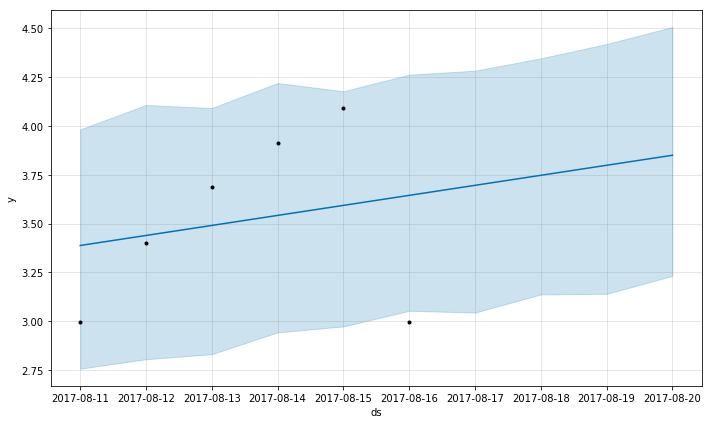

In [298]:
model.plot(forecast)

In [299]:
forecastData= [np.exp(y) for y in forecast['yhat'][-forecastDay:]]

In [305]:
print(forecastData)

[40.300930634691582, 42.424972686557076, 44.66096139987782, 47.014796872064757]


In [306]:
data=rawArrayDatas[1]+forecastData

In [307]:
data

[20.0,
 30.0,
 40.0,
 50.0,
 60.0,
 20.0,
 40.300930634691582,
 42.424972686557076,
 44.66096139987782,
 47.014796872064757]

[20.0, 30.0, 40.0, 50.0, 60.0, 20.0, <generator object <genexpr> at 0x000001E24A2881A8>]


In [200]:
ans=np.log10(10)

In [173]:
ans

1.0

In [174]:
np.exp(ans)

2.7182818284590451

In [177]:
data= [np.exp(y) for y in forecast['yhat']]

In [178]:
print(data)

[29.612466176387688, 31.173202134528449, 32.816199704563701, 34.545794582779671, 36.366548303339172, 38.283230540225226, 40.300930634691582, 42.424972686557076, 44.66096139987782, 47.014796872064757]


In [165]:
date= [d.strftime('%Y-%m-%d') for d in forecast['ds']]

In [159]:
date

['2017-08-11',
 '2017-08-12',
 '2017-08-13',
 '2017-08-14',
 '2017-08-15',
 '2017-08-16',
 '2017-08-17',
 '2017-08-18',
 '2017-08-19',
 '2017-08-20']

In [129]:
dateStamp = list(forecast['ds'][-forecastDay:])
dateStamp
date = [p.strftime('%Y-%m-%d') for p in dateStamp]
date

['2017-08-16', '2017-08-17', '2017-08-18', '2017-08-19']

In [130]:
realForecast['Bayseian'] = Bayseian(preprocessedData=XY, forecastDay=forecastDay)[0]

NameError: name 'Bayseian' is not defined

In [99]:
realForecast

{'Bayseian':           ds
 5 2017-08-16
 6 2017-08-17
 7 2017-08-18
 8 2017-08-19}

In [42]:
XY = PrepareBayseian(rawArrayDatas)

In [43]:
Bayseian(preprocessedData=XY, forecastDay=forecastDay)[0]

Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


,ds
5,2017-08-16
6,2017-08-17
7,2017-08-18
8,2017-08-19


In [33]:
LearningModuleRunner(rawArrayDatas, processId, forecastDay)

Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [40]:
realForecast

{}

In [49]:
type(realForecast['Bayseian'])

pandas.core.frame.DataFrame

In [2]:
import sys
print(sys.version)

3.5.3 |Continuum Analytics, Inc.| (default, May 15 2017, 10:43:23) [MSC v.1900 64 bit (AMD64)]


In [63]:
#data 준비위한 하드코딩
#rawArrayDatas
df0=pd.read_csv('./data/397_replace0with1.csv')
df0['y'] = np.log(df0['y'])
ds=df0['ds']
y=df0['y']

In [4]:
#processId
processId=1
#정식적인 data input과정
rawArrayDatas=[['2016-01-01','2016-01-02','2016-01-03','2016-01-04','2016-01-05'],[10,10,12,13,14]]
ds=rawArrayDatas[0]
y=rawArrayDatas[1]
sales=list(zip(ds,y))
day=5

In [150]:
sales

[('2016-01-01', 10),
 ('2016-01-02', 10),
 ('2016-01-03', 12),
 ('2016-01-04', 13),
 ('2016-01-05', 14)]

In [143]:
rawArrayDatas[:][:2]

[['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04', '2016-01-05'],
 [10, 10, 12, 13, 14]]

In [144]:
rawArrayDatas=[['2016-01-01','2016-01-02','2016-01-03','2016-01-04','2016-01-05'],[10,10,12,13,14]]
ds=rawArrayDatas[0]
y=rawArrayDatas[1]

In [147]:
sales = list(zip(rawArrayDatas[0], rawArrayDatas[1]))

In [146]:
y

[10, 10, 12, 13, 14]

In [148]:
sales

[('2016-01-01', 10),
 ('2016-01-02', 10),
 ('2016-01-03', 12),
 ('2016-01-04', 13),
 ('2016-01-05', 14)]

In [124]:
ds=rawArrayDatas[0]
#-->year, month, dayOfWeek 추출

year=[2016,2016, 2016, 2017]
month=[1,1,1,1]
dayOfWeek=[1,2,3,4]
y=rawArrayDatas[1][:len(train)]

In [ ]:
ds=rawArrayDatas[0]
#-->year, month, dayOfWeek 추출

year=np.random.beta(2000, 2017, len(train))*(2017-2000)
month=np.random.beta(1, 12, len(train))*(12-1)
dayOfWeek=np.random.beta(0, 6, len(train))*(6-0)
y=rawArrayDatas[1][:len(train)]

In [152]:
year

[2016, 2016, 2016, 2017]

In [153]:
month

[1, 1, 1, 1]

In [154]:
dayOfWeek

[1, 2, 3, 4]

In [155]:
sales=list(zip(year, month, dayOfWeek, y))

In [156]:
sales

[(2016, 1, 1, 10), (2016, 1, 2, 10), (2016, 1, 3, 12), (2017, 1, 4, 13)]

In [157]:
x = pd.DataFrame(data = sales, columns=['year', 'month', 'dayOfWeek','y'])

In [158]:
x

,year,month,dayOfWeek,y
0,2016,1,1,10
1,2016,1,2,10
2,2016,1,3,12
3,2017,1,4,13


In [125]:
y

[10, 10, 12, 13]

In [108]:
np.size(y)

392

In [126]:
x = pd.DataFrame(data = sales, columns=['year', 'month', 'dayOfWeek','y'])
x['month']

0    1
Name: month, dtype: int64

In [66]:
type(rawArrayDatas)

list

In [127]:
x

,year,month,dayOfWeek,y
0,2016,1,1,0 3.526361 1 3.713572 2 3.98898...


In [62]:
type(x)

pandas.core.frame.DataFrame

In [49]:
list(df)

['ds', 'y']

In [34]:
#값에 0이 있으면 log를 할 때 inf가 되므로 Initialization failed. 오류가 나니 주의할 것.
m = Prophet()
m.fit(df);

Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [53]:
future = m.make_future_dataframe(periods=day)
future.tail()

,ds
392,2017-01-27
393,2017-01-28
394,2017-01-29
395,2017-01-30
396,2017-01-31


In [54]:
future[-day:]

,ds
392,2017-01-27
393,2017-01-28
394,2017-01-29
395,2017-01-30
396,2017-01-31


In [159]:
future

,ds
0,2016-01-01
1,2016-01-02
2,2016-01-03
3,2016-01-04
4,2016-01-05
5,2016-01-06
6,2016-01-07
7,2016-01-08
8,2016-01-09
9,2016-01-10


In [36]:
forecast=m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
392,2017-01-27,3.826318,3.098217,4.562641
393,2017-01-28,3.836739,3.115983,4.572362
394,2017-01-29,3.741370,3.053969,4.465159
395,2017-01-30,3.965737,3.280206,4.620421
396,2017-01-31,3.850588,3.135154,4.531074


In [166]:
temp=list(forecast['ds'][-day:])
date=[p.strftime('%Y-%m-%d') for p in temp]

In [169]:
date=[p.strftime('%Y-%m-%d') for p in temp]

In [170]:
date

['2017-01-27', '2017-01-28', '2017-01-29', '2017-01-30', '2017-01-31']

In [ ]:
strftime('We are the %d, %b %Y')

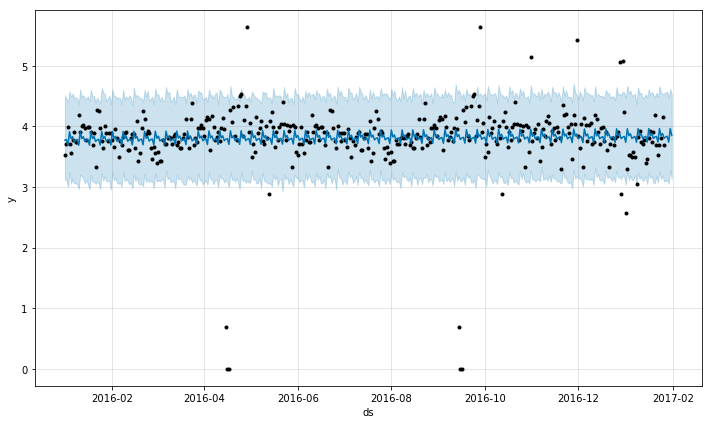

In [37]:
m.plot(forecast)

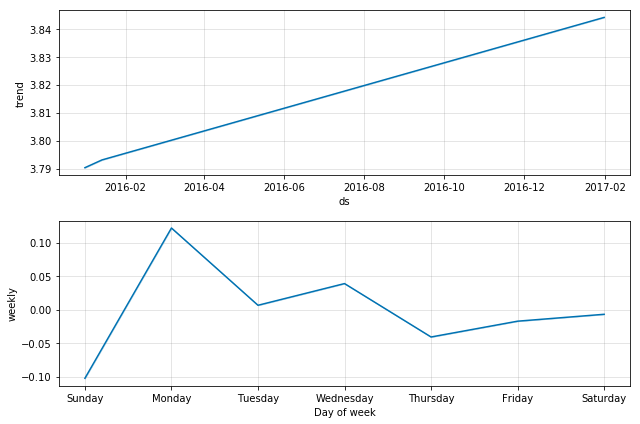

In [38]:
m.plot_components(forecast)